In [11]:
from netCDF4 import Dataset
import numpy as np
import os
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import random

In [12]:
hechms_discharge_file = '/home/hasitha/PycharmProjects/DSS-Framework/output/discharge/distributed_hechms_Discharge.csv'
observed_discharge_file = '/home/hasitha/PycharmProjects/DSS-Framework/output/discharge/observed_discharge.csv'

In [13]:
for i in range(10):
    print(random.uniform(1.0, 2.0))

1.5564248203564732
1.9994760759254322
1.8442932204313827
1.511800046647803
1.5530526279668648
1.4911051230716272
1.890227717083209
1.3964753642256513
1.0275311643336735
1.1320489965870997


In [43]:
formatted_observed_df = pd.read_csv(observed_discharge_file)
print('formatted_observed_df : ', formatted_observed_df)
for ind in formatted_observed_df.index: 
    if (ind<20): 
        formatted_observed_df['Observed'][ind] = formatted_observed_df['Observed'][ind]*0.5
    elif (ind>20) and (ind<40): 
        formatted_observed_df['Observed'][ind] = formatted_observed_df['Observed'][ind]*1.25
    elif (ind>40) and (ind<60): 
        formatted_observed_df['Observed'][ind] = formatted_observed_df['Observed'][ind]*1.5
    elif (ind>60) and (ind<80): 
        formatted_observed_df['Observed'][ind] = formatted_observed_df['Observed'][ind]*1.75
    elif (ind>80) and (ind<100): 
        formatted_observed_df['Observed'][ind] = formatted_observed_df['Observed'][ind]*1.5
    else:
        formatted_observed_df['Observed'][ind] = formatted_observed_df['Observed'][ind]*1.75
print('formatted_observed_df : ', formatted_observed_df)
observed_df = pd.read_csv(observed_discharge_file)
print('observed_df : ', observed_df)
formatted_observed_df.to_csv('/home/hasitha/Desktop/formatted_discharge.csv',index = False)

formatted_observed_df :                      Time  Observed
0    2020-02-28 00:00:00    14.014
1    2020-02-28 01:00:00    21.943
2    2020-02-28 02:00:00    28.850
3    2020-02-28 03:00:00    33.094
4    2020-02-28 04:00:00    35.290
..                   ...       ...
116  2020-03-03 20:00:00     6.101
117  2020-03-03 21:00:00     4.893
118  2020-03-03 22:00:00     7.361
119  2020-03-03 23:00:00    14.014
120  2020-03-04 00:00:00    20.083

[121 rows x 2 columns]
formatted_observed_df :                      Time  Observed
0    2020-02-28 00:00:00   7.00700
1    2020-02-28 01:00:00  10.97150
2    2020-02-28 02:00:00  14.42500
3    2020-02-28 03:00:00  16.54700
4    2020-02-28 04:00:00  17.64500
..                   ...       ...
116  2020-03-03 20:00:00  10.67675
117  2020-03-03 21:00:00   8.56275
118  2020-03-03 22:00:00  12.88175
119  2020-03-03 23:00:00  24.52450
120  2020-03-04 00:00:00  35.14525

[121 rows x 2 columns]
observed_df :                      Time  Observed
0    2020-02

/home/hasitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/hasitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/hasitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/hasitha/.local/lib/py

Text(0,0.5,'Discharge(m3/s)')

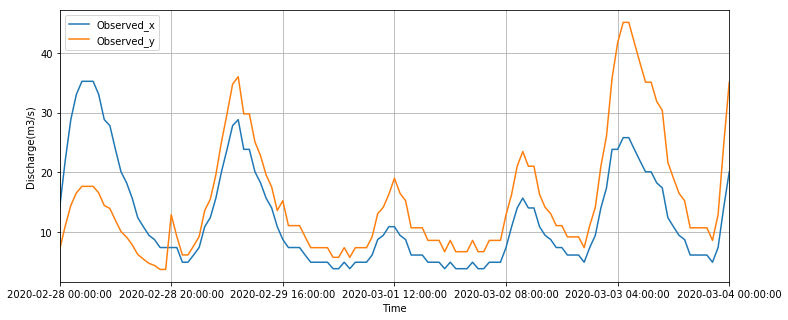

In [44]:
new_plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='left'), [observed_df, formatted_observed_df])
new_plot_df.plot(x='Time', kind='line', figsize=(12,5), grid=True).set_ylabel('Discharge(m3/s)')

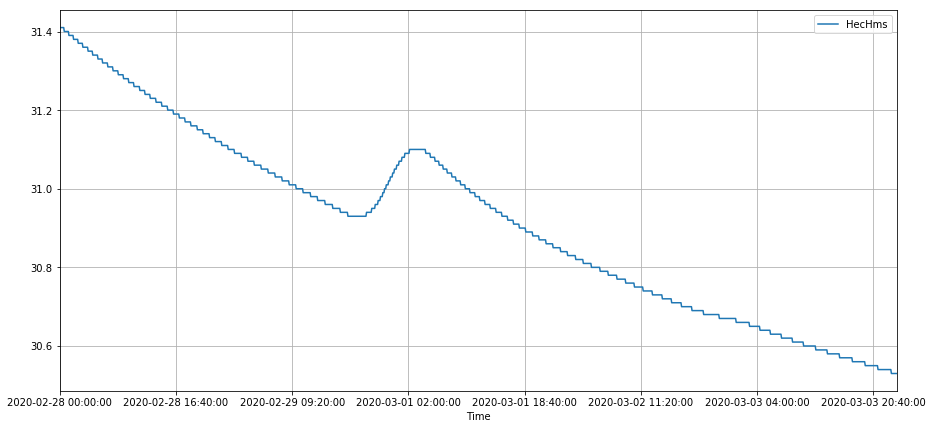

In [4]:
hechms_df = pd.read_csv(hechms_discharge_file)
#hechms_df['HecHms']= hechms_df['HecHms'] - 15
hechms_df.plot(x='Time', y='HecHms', kind='line', figsize=(15,7), grid=True)

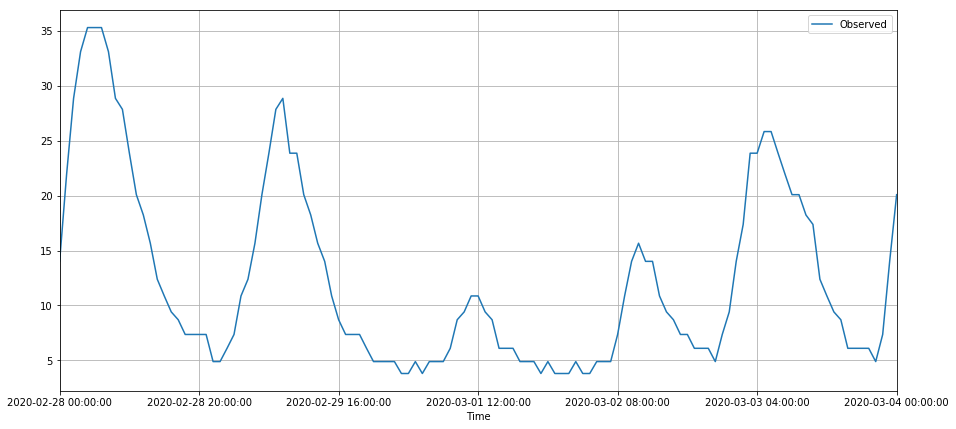

In [14]:
observed_df = pd.read_csv(observed_discharge_file)
observed_df.plot(x='Time', y='Observed', kind='line', figsize=(15,7), grid=True)

Text(0,0.5,'Discharge(m3/s)')

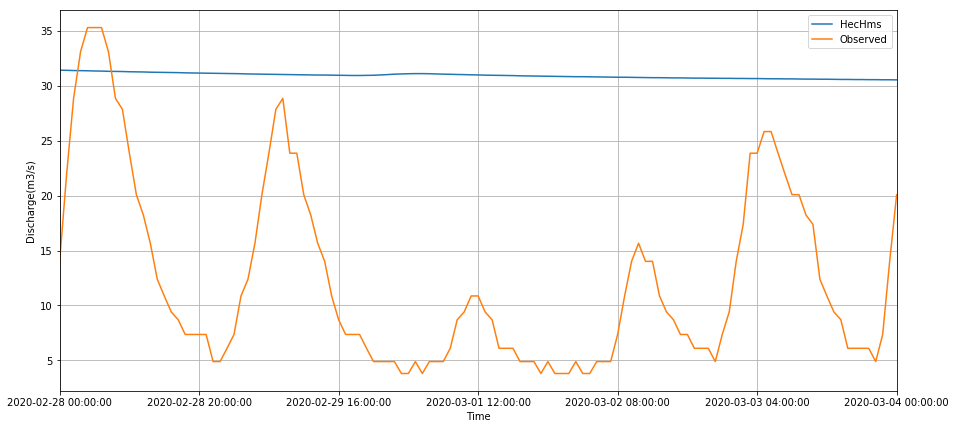

In [32]:
plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='left'), [observed_df, hechms_df])
#plot_df
plot_df.plot(x='Time', y=['HecHms','Observed'], kind='line', figsize=(15,7), grid=True).set_ylabel('Discharge(m3/s)')

In [7]:
print('observed sum :', observed_df['Observed'].sum())

observed sum : 1487.4760000000003


In [8]:
print('hechms sum :', hechms_df['HecHms'].sum())
hechms_df

hechms sum : 44549.86


,Time,HecHms
0,2020-02-28 00:00:00,31.41
1,2020-02-28 00:05:00,31.41
2,2020-02-28 00:10:00,31.41
3,2020-02-28 00:15:00,31.41
4,2020-02-28 00:20:00,31.41
...,...,...
1436,2020-03-03 23:40:00,30.53
1437,2020-03-03 23:45:00,30.53
1438,2020-03-03 23:50:00,30.53
1439,2020-03-03 23:55:00,30.53


In [71]:
def filter_df(df, time):
    filtered_df = df[(df['Time']==time)]
    if not filtered_df.empty:
        value = filtered_df.iloc[0]['HecHms']
        return value
    else:
        return 0.0
    
def get_formatted_df(input_file, start_time):
    input_df = pd.read_csv(input_file)
    time_series = []
    rain = 0.0
    start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
    for i in range(121):
        timestamp = start_time.strftime('%Y-%m-%d %H:%M:%S')
        rain = float(filter_df(input_df, timestamp))
        time_series.append([timestamp, rain])
        start_time = start_time + timedelta(hours=1)
    formatted_df = pd.DataFrame(time_series, columns=['Time','HecHms'])
    return formatted_df

In [72]:
hechms_df = get_formatted_df(hechms_discharge_file, '2020-02-28 00:00:00')
#hechms_df['HecHms']= hechms_df['HecHms'] - 15
hechms_df

,Time,HecHms
0,2020-02-28 00:00:00,31.41
1,2020-02-28 01:00:00,31.40
2,2020-02-28 02:00:00,31.38
3,2020-02-28 03:00:00,31.37
4,2020-02-28 04:00:00,31.36
...,...,...
116,2020-03-03 20:00:00,30.55
117,2020-03-03 21:00:00,30.55
118,2020-03-03 22:00:00,30.54
119,2020-03-03 23:00:00,30.54


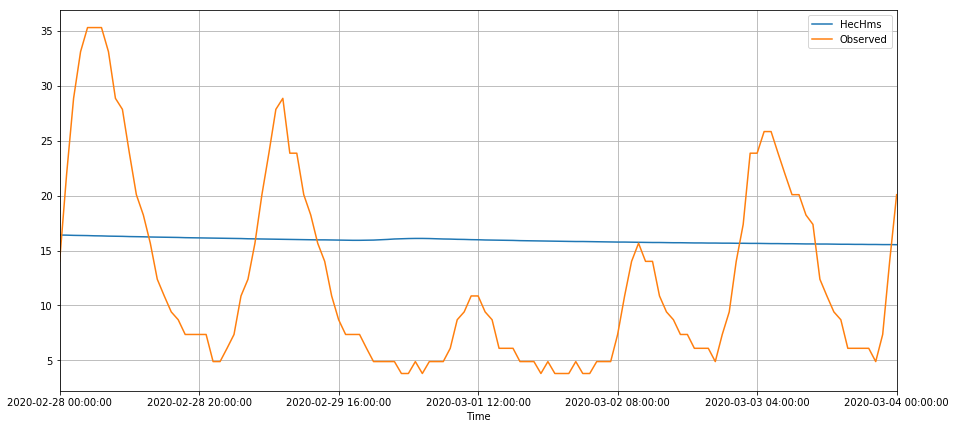

In [41]:
plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='left'), [observed_df, hechms_df])
plot_df.plot(x='Time', y=['HecHms','Observed'], kind='line', figsize=(15,7), grid=True)

In [45]:
print('observed sum :', observed_df['Observed'].sum())
print('hechms sum :', hechms_df['HecHms'].sum())
print('observed mean :', observed_df['Observed'].sum()/121)
print('hechms mean :', hechms_df['HecHms'].sum()/121)
hechms_mean = hechms_df['HecHms'].sum()/121
observed_mean = observed_df['Observed'].sum()/121
print('ratio : ', hechms_mean/observed_mean)

observed sum : 1487.4760000000003
hechms sum : 1925.84
observed mean : 12.293190082644632
hechms mean : 15.916033057851239
ratio :  1.2947032422707991


Text(0,0.5,'Discharge(m3/s)')

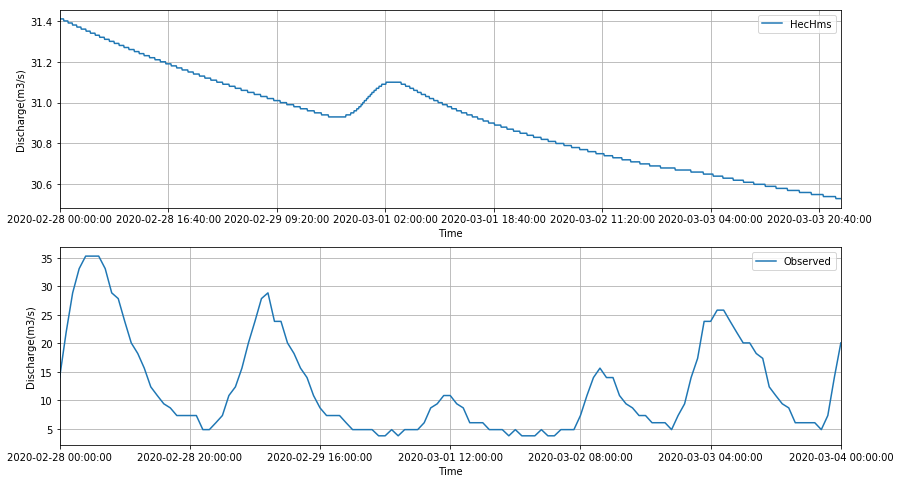

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
hechms_df.plot(ax=axes[0], x='Time', y='HecHms', kind='line', grid=True).set_ylabel('Discharge(m3/s)')
observed_df.plot(ax=axes[1], x='Time', y='Observed', kind='line', grid=True).set_ylabel('Discharge(m3/s)')

Text(0,0.5,'Discharge(m3/s)')

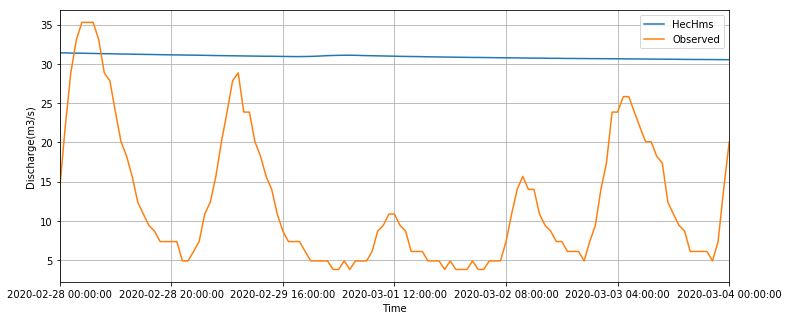

In [25]:
plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='left'), [observed_df, hechms_df])
plot_df.plot(x='Time', y=['HecHms','Observed'], kind='line', figsize=(12,5), grid=True).set_ylabel('Discharge(m3/s)')

In [63]:
sf_file = '/home/hasitha/PycharmProjects/DSS-Framework/output/discharge/SF.csv'
sf_df = pd.read_csv(sf_file)
sf_df

,Time,SF
0,2020-02-28 00:00:00,7.00700
1,2020-02-28 01:00:00,10.97150
2,2020-02-28 02:00:00,14.42500
3,2020-02-28 03:00:00,16.54700
4,2020-02-28 04:00:00,17.64500
...,...,...
116,2020-03-03 20:00:00,10.67675
117,2020-03-03 21:00:00,8.56275
118,2020-03-03 22:00:00,12.88175
119,2020-03-03 23:00:00,24.52450


In [64]:
sf_df.plot(x='Time', y=['Observed','SF'], kind='line', figsize=(15,7), grid=True).set_ylabel('Discharge(m3/s)')

KeyError: "['Observed'] not in index"

Text(0,0.5,'Discharge(m3/s)')

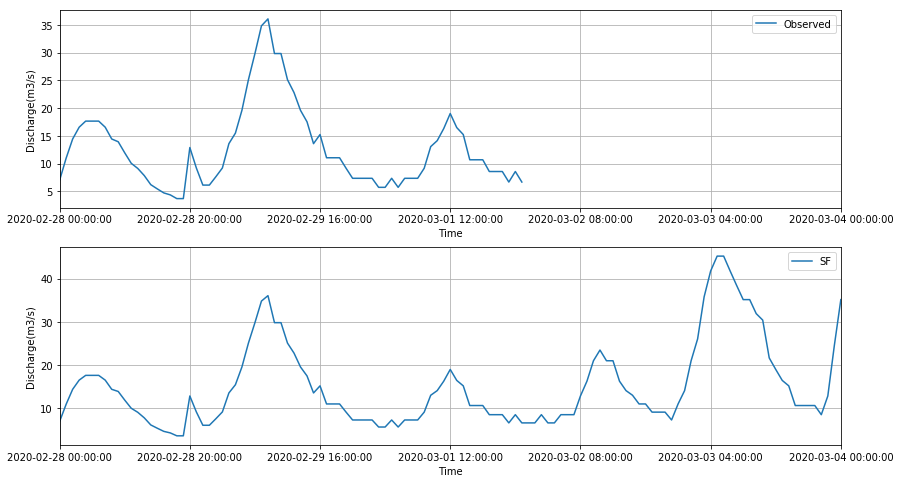

In [66]:
new_observed_file = '/home/hasitha/PycharmProjects/DSS-Framework/output/discharge/new_observed_discharge.csv'
new_observed_df = pd.read_csv(new_observed_file)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
new_observed_df.plot(ax=axes[0], x='Time', y='Observed', kind='line', grid=True).set_ylabel('Discharge(m3/s)')
# hechms_df.plot(ax=axes[0], x='Time', y='HecHms', kind='line', grid=True).set_ylabel('Discharge(m3/s)')
sf_df.plot(ax=axes[1], x='Time', y='SF', kind='line', grid=True).set_ylabel('Discharge(m3/s)')

Text(0,0.5,'Discharge(m3/s)')

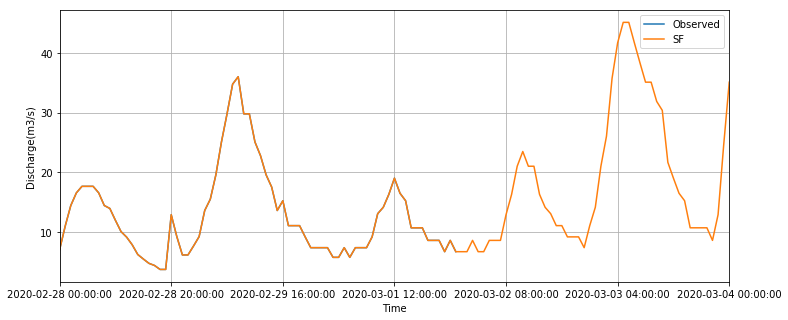

In [69]:
plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='left'), [new_observed_df, sf_df])
plot_df.plot(x='Time', y=['Observed','SF'], kind='line', figsize=(12,5), grid=True).set_ylabel('Discharge(m3/s)')

                    Time  HecHms        SF
0    2020-02-28 00:00:00   31.41   7.00700
1    2020-02-28 01:00:00   31.40  10.97150
2    2020-02-28 02:00:00   31.38  14.42500
3    2020-02-28 03:00:00   31.37  16.54700
4    2020-02-28 04:00:00   31.36  17.64500
..                   ...     ...       ...
116  2020-03-03 20:00:00   30.55  10.67675
117  2020-03-03 21:00:00   30.55   8.56275
118  2020-03-03 22:00:00   30.54  12.88175
119  2020-03-03 23:00:00   30.54  24.52450
120  2020-03-04 00:00:00   30.53  35.14525

[121 rows x 3 columns]


Text(0,0.5,'Discharge(m3/s)')

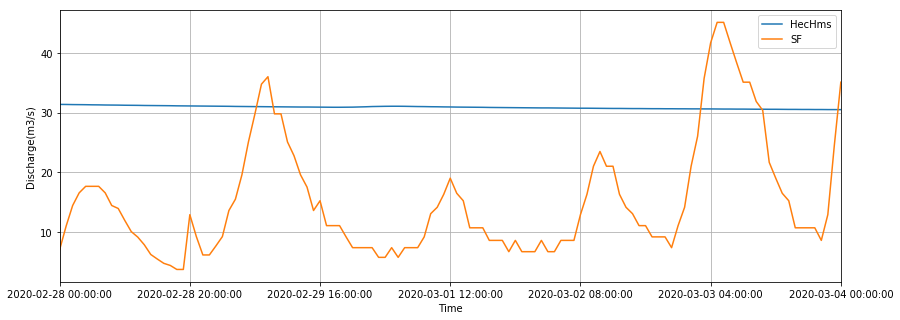

In [75]:
plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='left'), [hechms_df, sf_df])
print(plot_df)
plot_df.plot(x='Time', y=['HecHms','SF'], kind='line', figsize=(14,5), grid=True).set_ylabel('Discharge(m3/s)')

In [1]:
import pandas as pd
distribute_hechms_discharge_file = '/home/hasitha/PycharmProjects/DSS-Framework/output/discharge/distributed_hechms_2020-05-20_06_00_00_DailyDischarge.csv'

In [2]:
hechms_df = pd.read_csv(distribute_hechms_discharge_file,skiprows=1)
hechms_df

,Time,Flow
0,2020-05-17 00:00:00,439.36
1,2020-05-17 00:05:00,438.61
2,2020-05-17 00:10:00,437.86
3,2020-05-17 00:15:00,437.10
4,2020-05-17 00:20:00,436.35
...,...,...
1436,2020-05-21 23:40:00,4462.97
1437,2020-05-21 23:45:00,4457.03
1438,2020-05-21 23:50:00,4451.11
1439,2020-05-21 23:55:00,4445.23


In [3]:
hechms_df[(hechms_df['Time']>='2020-05-19 22:00:00') & (hechms_df['Flow'] > 1800)]

,Time,Flow
872,2020-05-20 00:40:00,1825.16
873,2020-05-20 00:45:00,1950.85
874,2020-05-20 00:50:00,2082.77
875,2020-05-20 00:55:00,2220.73
876,2020-05-20 01:00:00,2364.51
...,...,...
1436,2020-05-21 23:40:00,4462.97
1437,2020-05-21 23:45:00,4457.03
1438,2020-05-21 23:50:00,4451.11
1439,2020-05-21 23:55:00,4445.23


In [11]:
hechms_df[hechms_df['Flow'] > 15800].shape

(0, 2)

In [12]:
len(hechms_df[hechms_df['Flow'] > 15800].index)

0